In [1]:
from rouge_scores_sim_visualization import *
import os
import pickle
import numpy as np
from scipy.ndimage.filters import gaussian_filter
import datashader as ds, pandas as pd, colorcet

In [201]:
def plot_heatmap(corr,r1,r2,rl,attentions,decoding_layer=0, is_aggregated=False, save=False):
    
    cvs = ds.Canvas(plot_width=850, plot_height=500)
   
    
    
    if is_aggregated:
        corr_r1 = corr[1]
        corr_r2 = corr[2]
        corr_rl = corr[3]
        attentions = attentions
        r1 = r1
        r2 = r2
        rl = rl
    else:
        corr_r1 = corr[decoding_layer, 1]
        corr_r2 = corr[decoding_layer, 2]
        corr_rl = corr[decoding_layer, 3]
        attentions = attentions[decoding_layer]
        r1 = r1[decoding_layer]
        r2 = r2[decoding_layer]
        rl = rl[decoding_layer]
        
    df = pd.DataFrame(
    {'attention': attentions,
     'r1': r1,
     'r2': r2,
     'rl': rl
    })
    
    
    
    fig,axs = plt.subplots(3,1,figsize=(12,8))
    
    #fig.suptitle(f"Correlation to ROUGE-F(1/2/L) for Decoding-Layer {np.array(decoding_layer)+1}: {corr_r1:.2f} / {corr_r2:.2f} / {corr_rl:.2f}")
    
    for i,r_score in enumerate(["r1","r2","rl"]):
        agg = cvs.points(df, 'attention', r_score)
        img = ds.tf.shade(agg, cmap=colorcet.fire)
        axs[i].imshow(img, origin="lower", extent=[np.min(x),np.max(x),np.min(y),np.max(y)],cmap="hot")
        #axs[i].plot(x, poly1d_fn(x), '--k', c="blue")
        axs[i].set_xlabel(f"{r_score} - Score", fontsize=16)
        
    
    axs[1].set_ylabel("Global Attention Weights", fontsize=18)
    plt.tight_layout()
    
    if save:
        plt.savefig(f"correlation_plot_layer_{decoding_layer+1}.pdf")
    
    
    
    
    

    

# WikiSum

In [202]:
correlation_results_path = "../../correlation_results/wikisum"

In [203]:
r1 = pickle.load(open(os.path.join(correlation_results_path, "r1_list"), "rb"))
r2 = pickle.load(open(os.path.join(correlation_results_path, "r2_list"), "rb"))
rl = pickle.load(open(os.path.join(correlation_results_path, "rl_list"), "rb"))
attentions = pickle.load(open(os.path.join(correlation_results_path, "attention_list"), "rb"))

In [204]:
correlation_matrix = np.load(os.path.join(correlation_results_path, "corr_matrix.npy"))
first_layers_correlation = np.load(os.path.join(correlation_results_path, "first_layers_correlation.npy"))
last_layers_correlation = np.load(os.path.join(correlation_results_path, "last_layers_correlation.npy"))

In [205]:
print(correlation_matrix)

[[1.         0.21199426 0.19638383 0.20942622]
 [1.         0.02443826 0.02081385 0.02260276]
 [1.         0.21512715 0.23175081 0.22596256]
 [1.         0.10270224 0.12406447 0.11219944]
 [1.         0.1586311  0.19256265 0.1741416 ]
 [1.         0.41012597 0.51717295 0.45986967]
 [1.         0.46483648 0.57115358 0.51519929]
 [1.         0.48788201 0.57614657 0.53203546]]


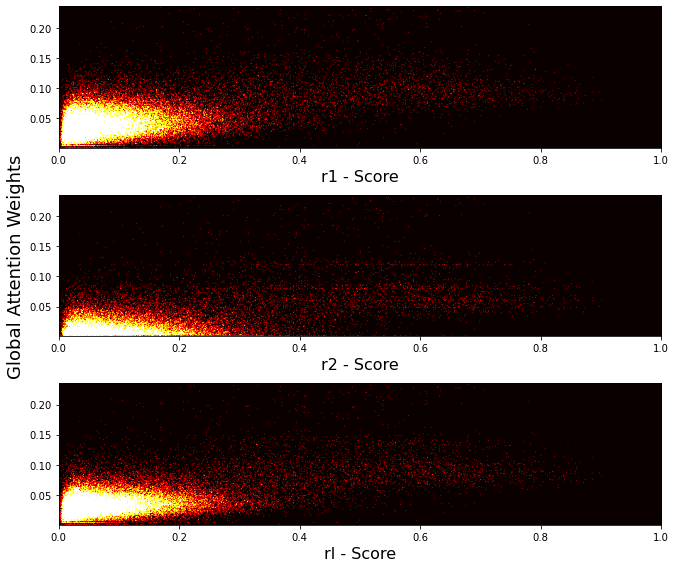

In [206]:
plot_heatmap(correlation_matrix, r1["all"], r2["all"], rl["all"], attentions["all"], decoding_layer=7,save=True)

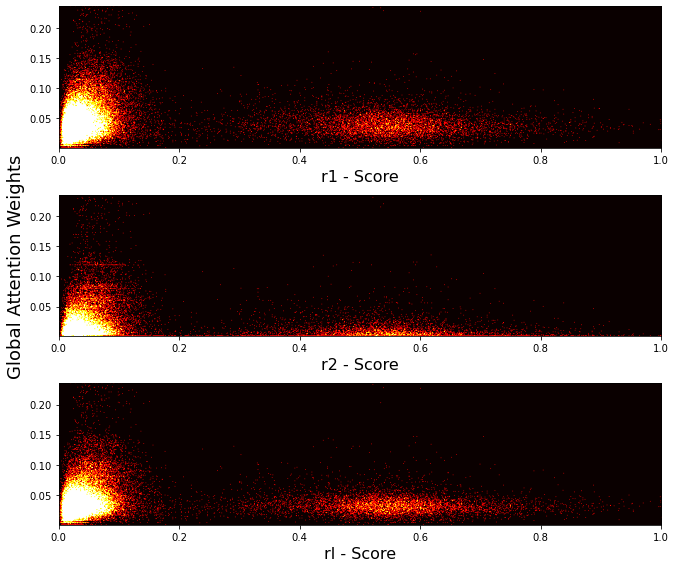

In [207]:
plot_heatmap(correlation_matrix, r1["all"], r2["all"], rl["all"], attentions["all"], decoding_layer=1,save=True)

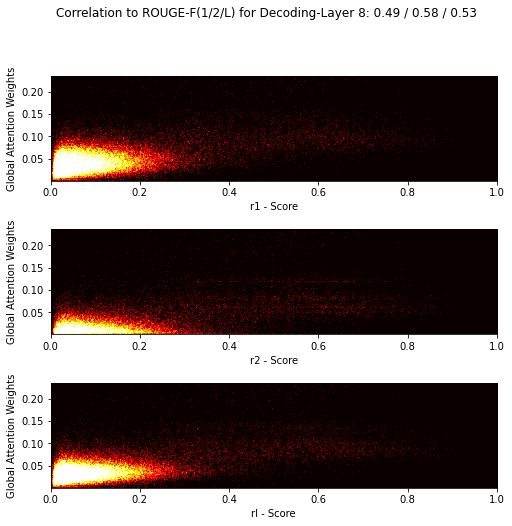

In [173]:
plot_heatmap(correlation_matrix, r1["all"], r2["all"], rl["all"], attentions["all"], decoding_layer=7)

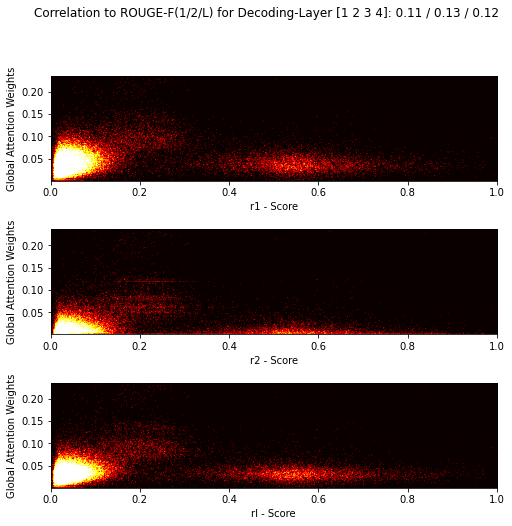

In [172]:
plot_heatmap(first_layers_correlation, r1["first"], r2["first"], rl["first"], attentions["first"], decoding_layer=[0,1,2,3], is_aggregated=True)

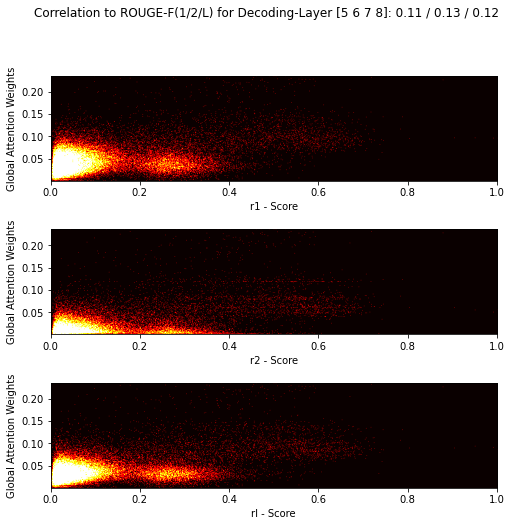

In [174]:
plot_heatmap(first_layers_correlation, r1["last"], r2["last"], rl["last"], attentions["last"], decoding_layer=[4,5,6,7], is_aggregated=True)

# MultiNews

In [195]:
correlation_results_path = "../../correlation_results/multinews"

In [196]:
r1 = pickle.load(open(os.path.join(correlation_results_path, "r1_list"), "rb"))
r2 = pickle.load(open(os.path.join(correlation_results_path, "r2_list"), "rb"))
rl = pickle.load(open(os.path.join(correlation_results_path, "rl_list"), "rb"))
attentions = pickle.load(open(os.path.join(correlation_results_path, "attention_list"), "rb"))

In [197]:
correlation_matrix = np.load(os.path.join(correlation_results_path, "corr_matrix.npy"))
first_layers_correlation = np.load(os.path.join(correlation_results_path, "first_layers_correlation.npy"))
last_layers_correlation = np.load(os.path.join(correlation_results_path, "last_layers_correlation.npy"))

In [198]:
print(correlation_matrix)

[[1.         0.18456102 0.20332512 0.19056571]
 [1.         0.16300441 0.18246839 0.16678854]
 [1.         0.13048173 0.15322287 0.13858442]
 [1.         0.32120347 0.3602866  0.33959787]
 [1.         0.46074901 0.53178155 0.49960257]
 [1.         0.56103994 0.68485648 0.62874139]
 [1.         0.55808798 0.68982501 0.63154453]
 [1.         0.46776867 0.5426677  0.50673897]]


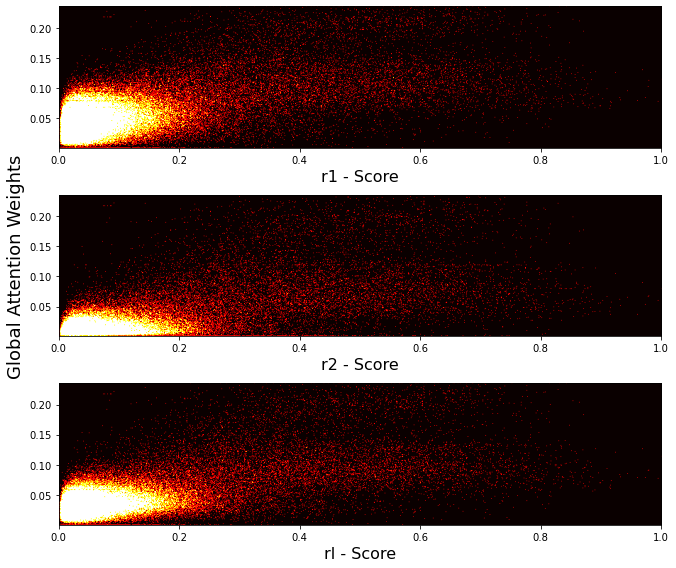

In [199]:
plot_heatmap(correlation_matrix, r1["all"], r2["all"], rl["all"], attentions["all"], decoding_layer=5,save=True)

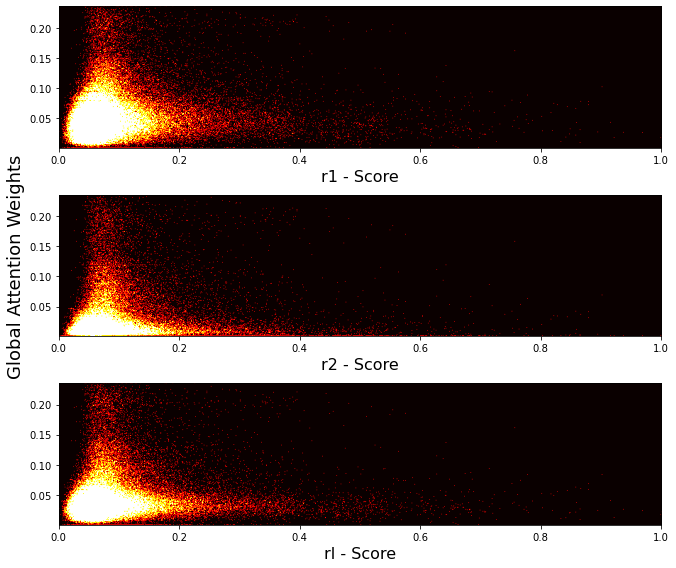

In [200]:
plot_heatmap(correlation_matrix, r1["all"], r2["all"], rl["all"], attentions["all"], decoding_layer=2,save=True)